In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from itertools import chain

def patches():
    r = 0.2;
    R = 2.;
    theta = np.linspace(0, 2*np.pi, 6, endpoint = False);
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    z = np.sqrt(R**2 - r**2)*np.ones(np.shape(theta))
    patchesE = [];
    patchesP = [];
    for i in range(6):
        j = (i+1)%6
        pi = [x[i], y[i], z[i]]
        pj = [x[j], y[j], z[j]]
        pk = [0.,0.,R]
        #element patches
        patchesE.append([pi,pj,pk])
        cjk = [0.5*x[j], 0.5*y[j], 0.5*(R+z[j])]
        cki = [0.5*x[i], 0.5*y[i], 0.5*(R+z[i])]
        cijk = [(x[i]+x[j])/3, (y[i] + y[j])/3., (R+z[i]+z[j])/3.]
        #patches centered around vertex
        patchesP.append([cki,cijk,pk])
        patchesP.append([pk,cijk,cjk])
    return x,y,z, patchesE, patchesP


        

In [66]:
patches()

(array([ 0.2,  0.1, -0.1, -0.2, -0.1,  0.1]),
 array([ 0.00000000e+00,  1.73205081e-01,  1.73205081e-01,  2.44929360e-17,
        -1.73205081e-01, -1.73205081e-01]),
 array([1.98997487, 1.98997487, 1.98997487, 1.98997487, 1.98997487,
        1.98997487]),
 [[[0.2, 0.0, 1.98997487421324],
   [0.10000000000000003, 0.17320508075688773, 1.98997487421324],
   [0.0, 0.0, 2.0]],
  [[0.10000000000000003, 0.17320508075688773, 1.98997487421324],
   [-0.09999999999999996, 0.17320508075688776, 1.98997487421324],
   [0.0, 0.0, 2.0]],
  [[-0.09999999999999996, 0.17320508075688776, 1.98997487421324],
   [-0.2, 2.4492935982947065e-17, 1.98997487421324],
   [0.0, 0.0, 2.0]],
  [[-0.2, 2.4492935982947065e-17, 1.98997487421324],
   [-0.10000000000000009, -0.1732050807568877, 1.98997487421324],
   [0.0, 0.0, 2.0]],
  [[-0.10000000000000009, -0.1732050807568877, 1.98997487421324],
   [0.09999999999999987, -0.1732050807568878, 1.98997487421324],
   [0.0, 0.0, 2.0]],
  [[0.09999999999999987, -0.1732050807568

In [56]:


def centroid(t):
    c = [0.,0., 0.];
    for i in range(3):
        for j in range(3):
            c[i] += t[j][i];
        c[i] /= 3.
    return c

def normal3(t):
    n = centroid(t)
    for i in range(3):
        n[i] -= 0.5
    return n

def map3(p):
    p2 = p
    for i in range(3):
        p2[i] -= 0.5
    pp = np.sqrt(p[0]*p[0] + p[1]*p[1] + p[2]*p[2])
    for i in range(3):
        p2[i] = 0.5  +  p2[i]* 0.05/pp
    return p2
        
def mapt(t):
    t2 = np.zeros(np.shape(t))
    for i in range(3):
        t2[i] = map3(t[i])
    return (t2)

def divide1(t):
    tris = []
    for i in range(4):
        tris.append(np.copy(t))
    a = t[0]
    b = t[1]
    c = t[2]
    a2 = 0.5*(a+b)
    b2 = 0.5*(b+c)
    c2 = 0.5*(c+a)
    tris[0][1] = a2
    tris[0][2] = c2
    tris[1][0] = a2;
    tris[1][2] = b2;
    tris[2][0] = b2;
    tris[2][1] = c2;
    tris[3][0] = a2;
    tris[3][1] = b2
    tris[3][2] = c2;
    return tris

def divide(t, n):
    tris0 = [t]
    for i in range(n):
        tris = []
        for j in range(len(tris0)):
            _tris = divide1(tris0[j])
            for k in range(4):
                tris.append(_tris[k])
        tris0 = tris
    for i in range(len(tris0)):
        tris0[i] = mapt(tris0[i])
    return tris0

<IPython.core.display.Javascript object>


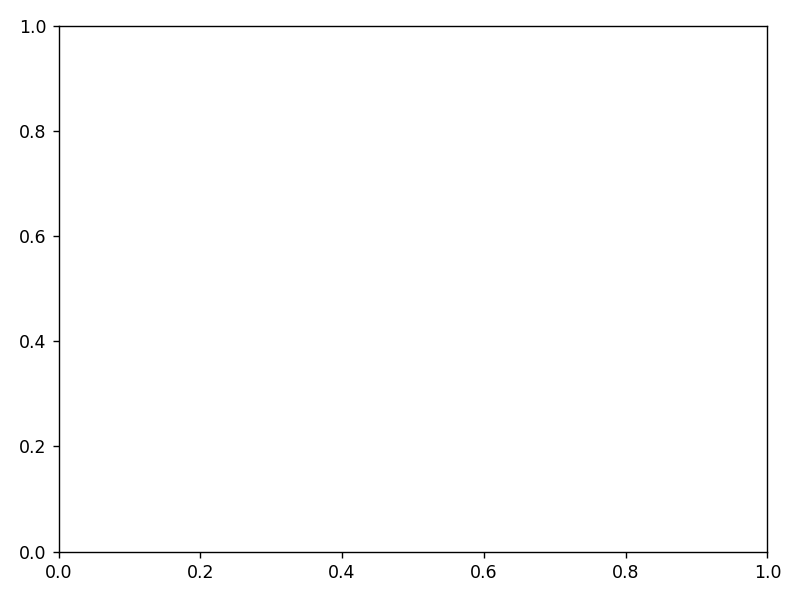

<IPython.core.display.Javascript object>


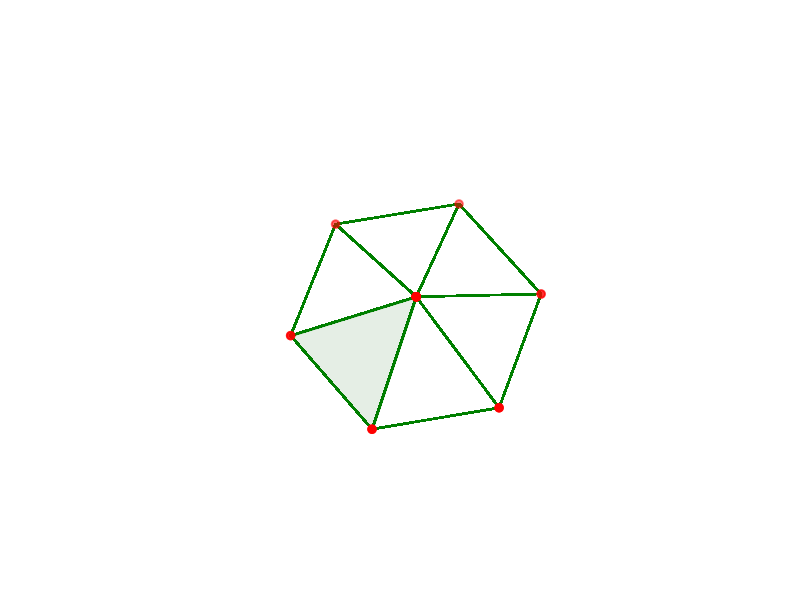

In [89]:
fig, ax1 = plt.subplots()

mpl.rcParams['legend.fontsize'] = 10

# ne x 3 x 3
# triangles = []
# for j in range(len(A)):
#     triangles.append(np.reshape(A[j], (3,3)))

xp,yp,zp, patchesE, patchesP = patches();
triangles = patchesE

tris_points = list(chain.from_iterable(triangles))
x, y, z = zip(*tris_points)
tris_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangles))]
ax = plt.figure().gca(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tris_idx, linewidth=1,  edgecolor='green', color = 'green',
                antialiased=False, shade=True, alpha = 0.)
x, y, z = zip(*tris_points)



triangles = [patchesE[0]]

tris_points = list(chain.from_iterable(triangles))
tris_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangles))]
ax.plot_trisurf(x, y, z, triangles=tris_idx, linewidth=1,  edgecolor='green', color = 'green',
                antialiased=False, shade=True, alpha = 0.1)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax.scatter(x,y,z, color = 'red')
ax.axis('off')
ax.axes.set_xlim3d(left=-.22, right=.22)
ax.axes.set_ylim3d(bottom=-.22, top=.22) 
ax.axes.set_zlim3d(bottom=1.98, top=2.02) 
ax.view_init(elev=70, azim=80)
plt.show()     

#plt.savefig("simplex3D.eps",bbox_inches='tight')
plt.savefig("epatch.png", bbox_inches='tight', dpi = 1200)

    

<IPython.core.display.Javascript object>


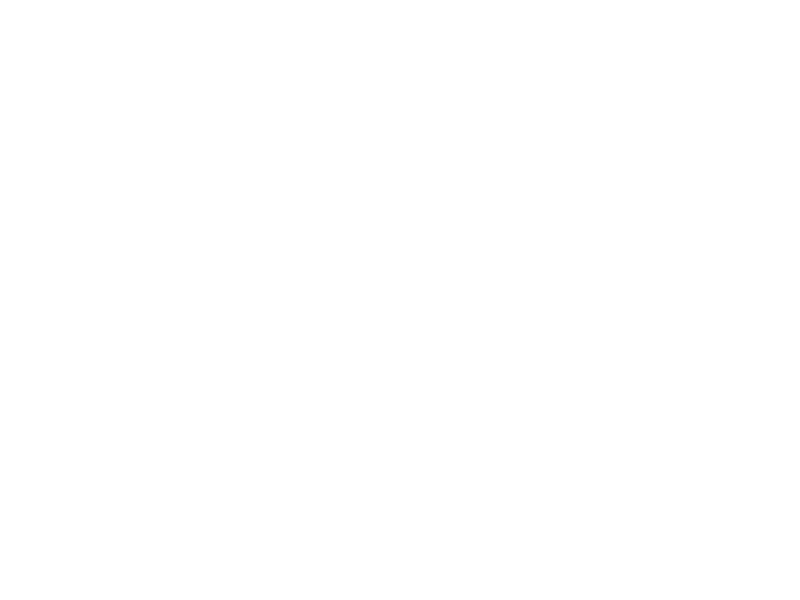

<IPython.core.display.Javascript object>


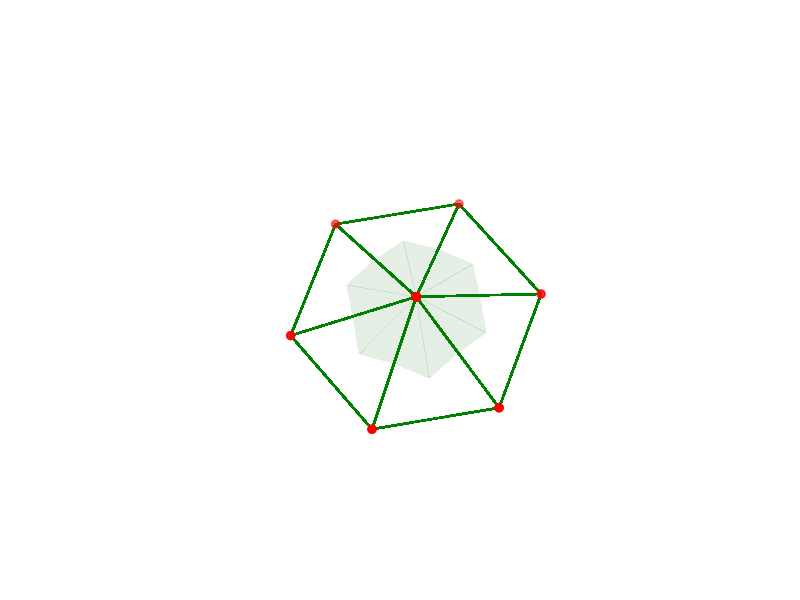

In [90]:
fig, ax1 = plt.subplots()

%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 10

# ne x 3 x 3
# triangles = []
# for j in range(len(A)):
#     triangles.append(np.reshape(A[j], (3,3)))

xp,yp,zp, patchesE, patchesP = patches();
triangles = patchesP

tris_points = list(chain.from_iterable(triangles))
x, y, z = zip(*tris_points)
tris_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangles))]
ax = plt.figure().gca(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tris_idx, linewidth=0,  edgecolor='green', color = 'green',
                antialiased=False, shade=True, alpha = 0.1)

triangles = patchesE

tris_points = list(chain.from_iterable(triangles))
x, y, z = zip(*tris_points)
tris_idx = [(3 * i, 3 * i + 1, 3 * i + 2) for i in range(len(triangles))]
ax.plot_trisurf(x, y, z, triangles=tris_idx, linewidth=1,  edgecolor='green', color = 'green',
                antialiased=False, shade=True, alpha = 0.)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax.scatter(x,y,z, color = 'red')
ax.axis('off')
ax.axes.set_xlim3d(left=-.22, right=.22)
ax.axes.set_ylim3d(bottom=-.22, top=.22) 
ax.axes.set_zlim3d(bottom=1.98, top=2.02) 
ax.view_init(elev=70, azim=80)
plt.show()     

#plt.savefig("simplex3D.eps",bbox_inches='tight')
plt.savefig("ppatch.png", bbox_inches='tight', dpi = 1200)

    

In [44]:
tris_idx

[(0, 1, 2), (3, 4, 5), (6, 7, 8), (9, 10, 11), (12, 13, 14), (15, 16, 17)]